In [4]:
import pandas as pd
import random
temp = pd.DataFrame()
temp['xyz'] = random.choices(['x','y','z'],k=100)
temp['target'] = random.choices([0,1],k=100)
temp['cont'] = random.choices(range(100),k=100)

In [5]:
temp.head()

,xyz,target,cont
0,x,0,36
1,y,0,79
2,y,0,21
3,x,0,77
4,x,1,6


<AxesSubplot:ylabel='target'>

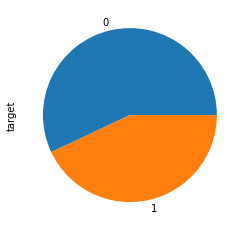

In [13]:
(temp['target'].value_counts(1)*100).plot(kind='pie')

<AxesSubplot:>

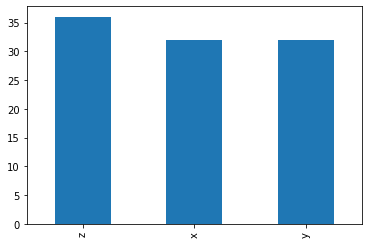

In [14]:
temp.xyz.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='xyz'>

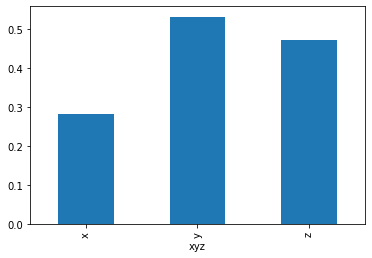

In [32]:
# of 1 /total # records
temp.groupby('xyz')['target'].mean().plot(kind='bar')

In [19]:
temp.groupby('xyz')['target'].value_counts().unstack()

target,0,1
xyz,,
x,23,9
y,15,17
z,19,17


<AxesSubplot:xlabel='xyz'>

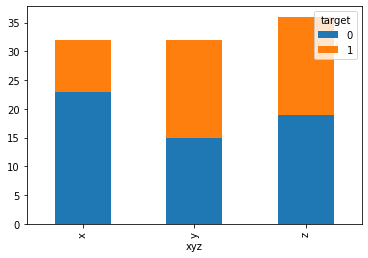

In [20]:
temp.groupby('xyz')['target'].value_counts().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='xyz'>

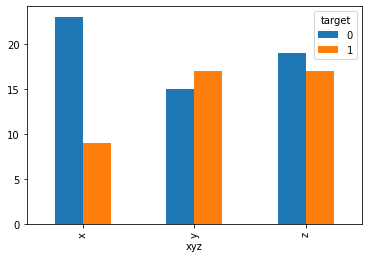

In [21]:
temp.groupby('xyz')['target'].value_counts().unstack().plot(kind='bar')

In [25]:
pd.cut(temp.cont,3).value_counts()

(2.904, 35.0]    36
(35.0, 67.0]     32
(67.0, 99.0]     32
Name: cont, dtype: int64

In [27]:
temp['cont_bin'] = pd.cut(temp.cont,3)
temp['cont_bin']

0      (35.0, 67.0]
1      (67.0, 99.0]
2     (2.904, 35.0]
3      (67.0, 99.0]
4     (2.904, 35.0]
          ...      
95    (2.904, 35.0]
96    (2.904, 35.0]
97     (35.0, 67.0]
98    (2.904, 35.0]
99     (67.0, 99.0]
Name: cont_bin, Length: 100, dtype: category
Categories (3, interval[float64]): [(2.904, 35.0] < (35.0, 67.0] < (67.0, 99.0]]

<AxesSubplot:xlabel='cont_bin'>

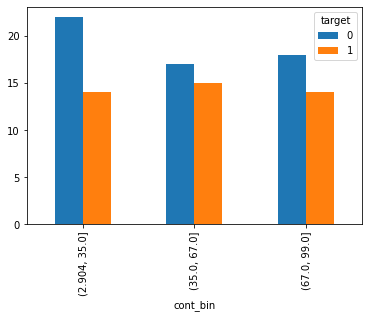

In [28]:
temp.groupby('cont_bin')['target'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='xyz'>

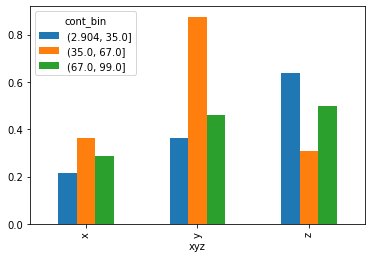

In [30]:
temp.groupby(['xyz','cont_bin'])['target'].mean().unstack().plot(kind='bar')

<AxesSubplot:xlabel='xyz'>

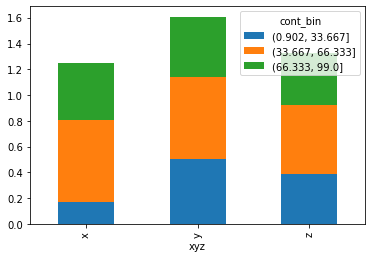

In [25]:
temp.groupby(['xyz','cont_bin'])['target'].mean().unstack().plot(kind='bar',stacked=True)

In [33]:
res={}
for col in ['xyz','cont_bin']:
    tempx = temp.groupby(col)['target'].mean()
    res[col] = max(tempx) - min(tempx)

pd.DataFrame(res.items())

,0,1
0,xyz,0.250000
1,cont_bin,0.079861


In [66]:
res

{'xyz': 0.10541310541310539, 'cont_bin': 0.07142857142857145}

C:\Users\King\anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:ylabel='Density'>

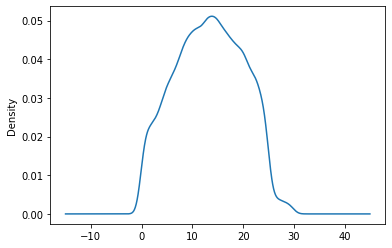

In [34]:
##
import pandas as pd
loan = pd.read_csv("loan.csv", sep=",")
loan['dti'].plot(kind='kde')

In [37]:
(loan.isna().sum()/loan.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [42]:
loan.shape

(39717, 111)

In [44]:
(loan.isna().sum(axis=1)/loan.shape[1])*100

0        52.252252
1        51.351351
2        53.153153
3        50.450450
4        49.549550
           ...    
39712    53.153153
39713    53.153153
39714    54.954955
39715    54.954955
39716    53.153153
Length: 39717, dtype: float64